In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/quality-of-life-for-each-country/Quality_of_Life.csv


In [2]:
df = pd.read_csv("/kaggle/input/quality-of-life-for-each-country/Quality_of_Life.csv")

In [3]:
df.head()

,country,Purchasing Power Value,Purchasing Power Category,Safety Value,Safety Category,Health Care Value,Health Care Category,Climate Value,Climate Category,Cost of Living Value,Cost of Living Category,Property Price to Income Value,Property Price to Income Category,Traffic Commute Time Value,Traffic Commute Time Category,Pollution Value,Pollution Category,Quality of Life Value,Quality of Life Category
0,Afghanistan,32.15,'Very Low',25.33,'Low',24.24,'Low',0.00,NaN,21.08,'Very Low',7.8,'Low',56.17,'Very High',84.44,'Very High',0.0,NaN
1,Aland Islands,125.01,'Very High',71.81,'High',79.72,'High',0.00,NaN,53.44,'Low',5.33,'Low',19.05,'Very Low',18.05,'Very Low',0.0,NaN
2,Albania,42.82,'Low',55.52,'Moderate',48.21,'Moderate',86.43,'Very High',40.85,'Low',14.88,'High',36.74,'Moderate',77.25,'High',': 104.16','Low'
3,Alderney,0.00,NaN,83.79,'Very High',100.00,'Very High',0.00,NaN,0.00,NaN,0.0,NaN,5.00,'Very Low',1.72,'Very Low',0.0,NaN
4,Algeria,27.60,'Very Low',47.54,'Moderate',54.43,'Moderate',94.82,'Very High',25.31,'Very Low',21.7,'Very High',45.09,'High',63.87,'High',': 98.83','Very Low'


In [4]:
df.describe()

,Purchasing Power Value,Safety Value,Health Care Value,Climate Value,Cost of Living Value,Traffic Commute Time Value,Pollution Value
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,55.573305,55.274449,54.731568,37.598178,37.526314,28.492966,54.266186
std,52.008245,16.914298,20.607381,40.851542,26.026565,17.347242,25.853695
min,0.000000,0.000000,0.000000,-3.540000,0.000000,0.000000,0.000000
25%,16.340000,43.857500,45.807500,0.000000,24.550000,17.100000,35.700000
50%,42.930000,54.635000,57.150000,0.000000,36.895000,29.845000,59.765000
75%,85.940000,68.132500,68.447500,79.332500,51.090000,38.870000,73.740000
max,281.830000,100.000000,100.000000,99.890000,137.370000,100.000000,106.900000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country                            236 non-null    object 
 1   Purchasing Power Value             236 non-null    float64
 2   Purchasing Power Category          190 non-null    object 
 3   Safety Value                       236 non-null    float64
 4   Safety Category                    234 non-null    object 
 5   Health Care Value                  236 non-null    float64
 6   Health Care Category               221 non-null    object 
 7   Climate Value                      236 non-null    float64
 8   Climate Category                   114 non-null    object 
 9   Cost of Living Value               236 non-null    float64
 10  Cost of Living Category            191 non-null    object 
 11  Property Price to Income Value     236 non-null    object 

In [6]:
df.isnull().sum()

country                                0
Purchasing Power Value                 0
Purchasing Power Category             46
Safety Value                           0
Safety Category                        2
Health Care Value                      0
Health Care Category                  15
Climate Value                          0
Climate Category                     122
Cost of Living Value                   0
Cost of Living Category               45
Property Price to Income Value         0
Property Price to Income Category     21
Traffic Commute Time Value             0
Traffic Commute Time Category         29
Pollution Value                        0
Pollution Category                    10
Quality of Life Value                  0
Quality of Life Category             122
dtype: int64

In [7]:
# Como duas colunas possuem mais de 50% dos valores nulos, vamos retirá-las
df.drop(['Climate Category', 'Quality of Life Category'], axis=1, inplace=True)

In [8]:
# A ideia é criar duas listas, cada uma vai conter variaveis do mesmo tipo.
# Depois vamos percorrer as listas imprimindo gráficos, quantidades e estatísticas

col_cat = []
col_num = []

for col in df.columns:
    if df[col].dtype == 'object':
        col_cat.append(col)
    else:
        col_num.append(col)

In [9]:
# Verificando os valores da lista
col_num

['Purchasing Power Value',
 'Safety Value',
 'Health Care Value',
 'Climate Value',
 'Cost of Living Value',
 'Traffic Commute Time Value',
 'Pollution Value']

In [10]:
# Verificando os valores da lista
col_cat

['country',
 'Purchasing Power Category',
 'Safety Category',
 'Health Care Category',
 'Cost of Living Category',
 'Property Price to Income Value',
 'Property Price to Income Category',
 'Traffic Commute Time Category',
 'Pollution Category',
 'Quality of Life Value']

In [11]:
for col in df.columns:
    if df[col].dtype == 'category':
        df.fillna({col: 'Valor Desconhecido'}, inplace=True)
    else:
        df.fillna({col: 0}, inplace=True)

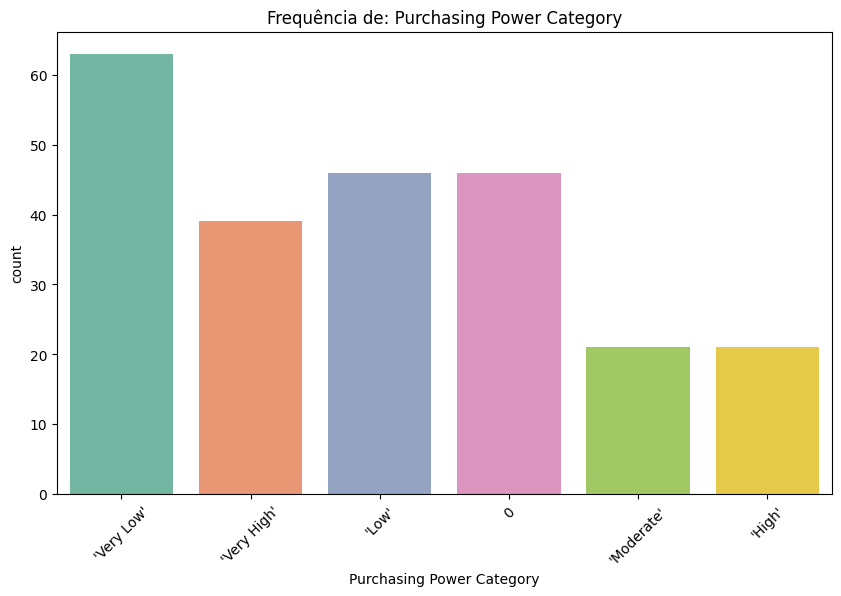

Frequência da coluna Purchasing Power Category:
  Purchasing Power Category  Frequência
0                'Very Low'          63
1                     'Low'          46
2                         0          46
3               'Very High'          39
4                'Moderate'          21
5                    'High'          21


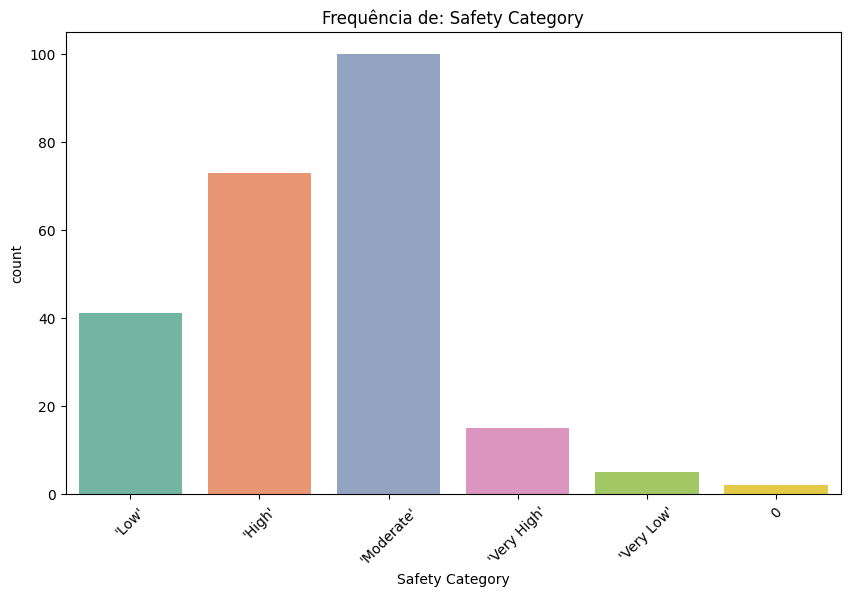

Frequência da coluna Safety Category:
  Safety Category  Frequência
0      'Moderate'         100
1          'High'          73
2           'Low'          41
3     'Very High'          15
4      'Very Low'           5
5               0           2


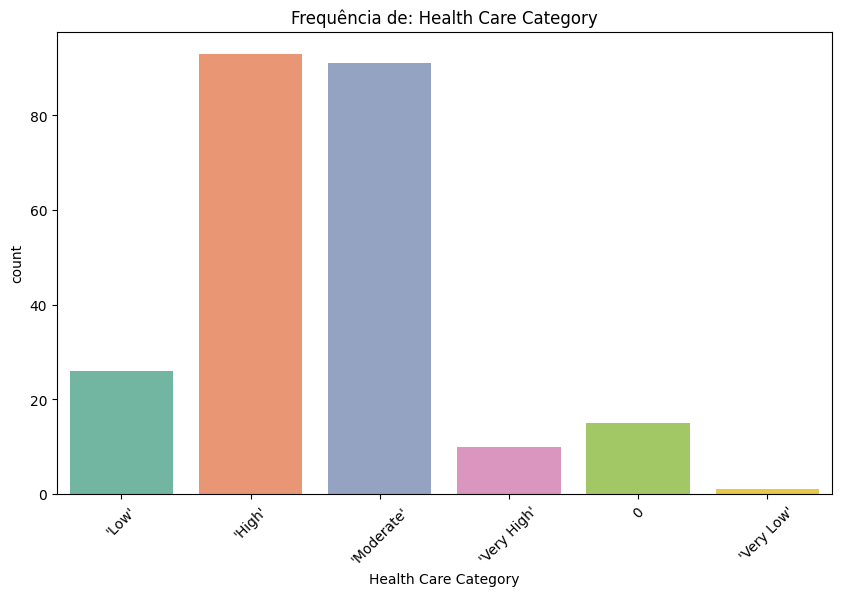

Frequência da coluna Health Care Category:
  Health Care Category  Frequência
0               'High'          93
1           'Moderate'          91
2                'Low'          26
3                    0          15
4          'Very High'          10
5           'Very Low'           1


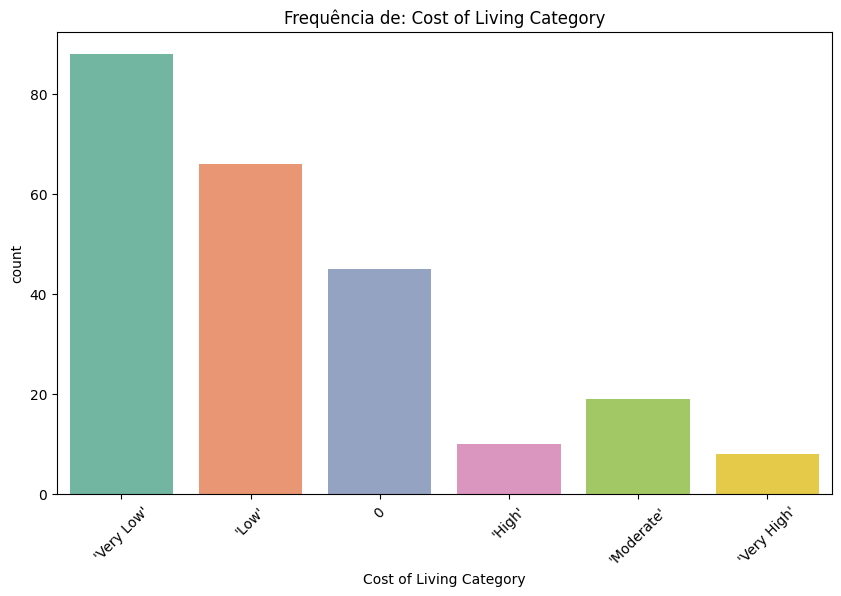

Frequência da coluna Cost of Living Category:
  Cost of Living Category  Frequência
0              'Very Low'          88
1                   'Low'          66
2                       0          45
3              'Moderate'          19
4                  'High'          10
5             'Very High'           8


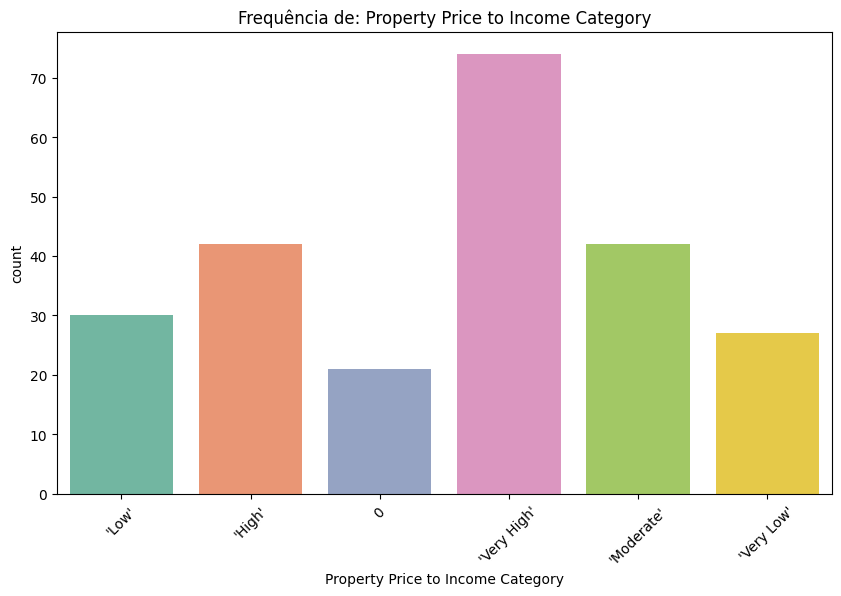

Frequência da coluna Property Price to Income Category:
  Property Price to Income Category  Frequência
0                       'Very High'          74
1                            'High'          42
2                        'Moderate'          42
3                             'Low'          30
4                        'Very Low'          27
5                                 0          21


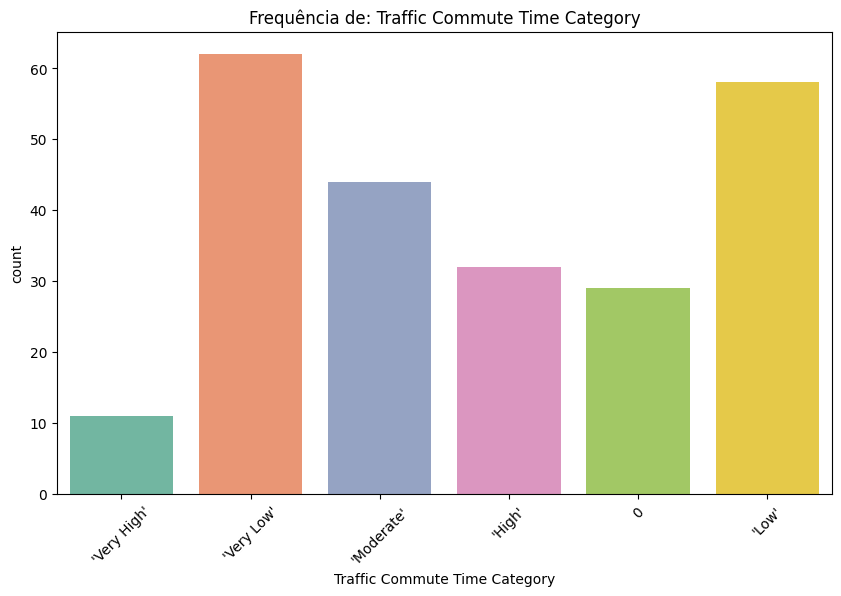

Frequência da coluna Traffic Commute Time Category:
  Traffic Commute Time Category  Frequência
0                    'Very Low'          62
1                         'Low'          58
2                    'Moderate'          44
3                        'High'          32
4                             0          29
5                   'Very High'          11


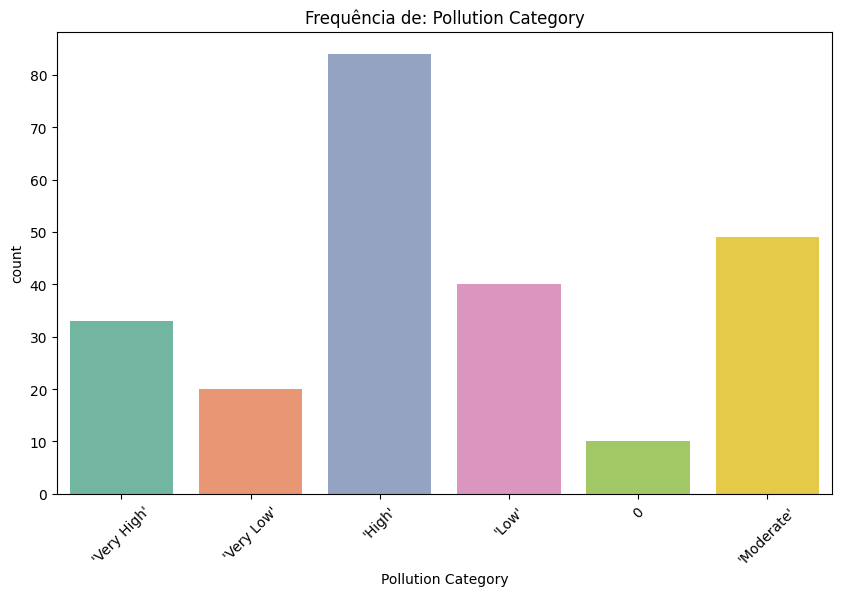

Frequência da coluna Pollution Category:
  Pollution Category  Frequência
0             'High'          84
1         'Moderate'          49
2              'Low'          40
3        'Very High'          33
4         'Very Low'          20
5                  0          10


In [12]:
for col in col_cat:
    if col == 'country' or col == 'Property Price to Income Value' or col == 'Quality of Life Value':
        continue
    plt.figure(figsize=(10, 6))
    plt.title(f"Frequência de: {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Frequência")
    sns.countplot(data=df, x=col, palette="Set2")  # Use uma paleta válida, como "Set2"
    plt.xticks(rotation=45)
    plt.show()  # Exibe o gráfico
    # Conta a frequência dos valores na coluna
    qtd = df[col].value_counts().reset_index(name='Frequência')
    qtd.columns = [col, 'Frequência']
    # Imprime as frequências
    print(f'Frequência da coluna {col}:')
    print(qtd)

In [13]:
for col in col_num:
    # Conta a frequência dos valores na coluna
    qtd = df[col].value_counts().reset_index(name='Frequência')
    qtd.columns = [col, 'Frequência']
    # Imprime as frequências
    print("\n")
    print(f'Frequência da coluna {col}:')
    print(qtd)
    print("\n")
    print(f'Estatísticas da {col}:')
    print(qtd.describe())



Frequência da coluna Purchasing Power Value:
     Purchasing Power Value  Frequência
0                      0.00          46
1                     57.92           2
2                     58.05           2
3                     32.15           1
4                     18.89           1
..                      ...         ...
184                   31.88           1
185                  120.60           1
186                   40.26           1
187                  142.95           1
188                   28.76           1

[189 rows x 2 columns]


Estatísticas da Purchasing Power Value:
       Purchasing Power Value  Frequência
count              189.000000  189.000000
mean                68.779524    1.248677
std                 49.663218    3.274102
min                  0.000000    1.000000
25%                 32.510000    1.000000
50%                 52.080000    1.000000
75%                103.020000    1.000000
max                281.830000   46.000000


Frequência da coluna Safety